In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
sns.set()

Read data from file

In [9]:
all_tracks_df = pd.read_pickle("../../data/spotify_dataset_all.pkl")

In [10]:
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.0939,0.03360,2,-24.041,0,0.0606,0.927,0.830,0.0954,0.0516,67.359,207267,3
5bu9A6uphPWg39RC3ZKeku,classical,0.4540,0.01390,4,-29.966,0,0.0514,0.995,0.943,0.0736,0.2440,130.253,184853,4
3DNRdudZ2SstnDCVKFdXxG,classical,0.1840,0.00527,1,-37.264,0,0.0432,0.995,0.887,0.1730,0.1510,170.612,315427,3
67TCAXIe154ZGDNaWceqxC,classical,0.1590,0.04010,7,-27.516,1,0.0446,0.984,0.760,0.1560,0.1060,106.239,462627,4
1Oo7XEqkrwifJn17aA0ocF,classical,0.2990,0.00626,9,-30.923,1,0.0478,0.994,0.901,0.0823,0.0634,69.043,378733,4


Normalise values

In [11]:
normalised_vals_df = all_tracks_df.loc[:, all_tracks_df.columns != 'genre']
normalised_vals_df = (normalised_vals_df - normalised_vals_df.min())/(normalised_vals_df.max() - normalised_vals_df.min())
all_tracks_df = pd.merge(all_tracks_df[['genre']], normalised_vals_df, left_index=True, right_index=True)
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.035683,0.032810,0.181818,0.441113,0.0,0.101165,0.930723,0.845214,0.084732,0.029023,0.148602,0.084694,0.50
5bu9A6uphPWg39RC3ZKeku,classical,0.426247,0.013053,0.363636,0.308423,0.0,0.076801,0.998996,0.960285,0.062150,0.229169,0.521763,0.062907,0.75
3DNRdudZ2SstnDCVKFdXxG,classical,0.133406,0.004398,0.090909,0.144985,0.0,0.055085,0.998996,0.903259,0.165113,0.132425,0.761220,0.189824,0.50
67TCAXIe154ZGDNaWceqxC,classical,0.106291,0.039328,0.636364,0.363290,1.0,0.058792,0.987952,0.773931,0.147504,0.085613,0.379284,0.332902,0.75
1Oo7XEqkrwifJn17aA0ocF,classical,0.258134,0.005391,0.818182,0.286991,1.0,0.067267,0.997992,0.917515,0.071162,0.041298,0.158594,0.251357,0.75


Change all genres except hip-hop to other

In [12]:
all_tracks_df.loc[all_tracks_df['genre'] != 'hip-hop', 'genre'] = 'other'

Look at genre distribution

<AxesSubplot:ylabel='genre'>

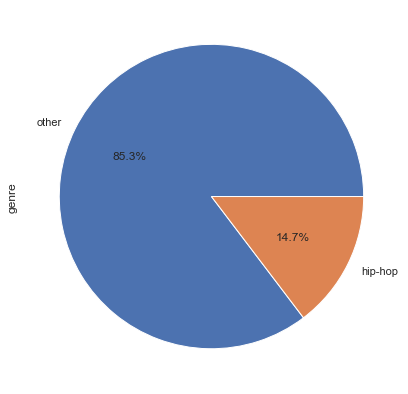

In [13]:
all_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

In [14]:
all_tracks_df['genre'].value_counts()

other      5638
hip-hop     969
Name: genre, dtype: int64

Resample data

In [15]:
pop_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'hip-hop'].sample(n=950, random_state=1)
other_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'other'].sample(n=950, random_state=1)
resampled_tracks_df = pd.concat([pop_sample_df, other_sample_df])
resampled_tracks_df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
7EZPH9Px3gXlxD5KJDwtwc,hip-hop,0.878525,0.744262,0.181818,0.857636,1.0,0.674258,0.002125,0.000000,0.131966,0.574534,0.526058,0.154249,0.75
6ZClQUx5QAuTuR2v2wx37F,hip-hop,0.744035,0.895699,0.090909,0.784606,0.0,0.716631,0.152608,0.271894,0.096747,0.858525,0.356987,0.083968,0.75
0x1LCpY9Rgeq97VPajm81B,hip-hop,0.632321,0.726210,1.000000,0.876089,1.0,0.126324,0.011242,0.000000,0.137145,0.582857,0.211601,0.099066,0.75
5mNV8Mz59bzyuQ53gTw0c0,hip-hop,0.580260,0.662025,0.454545,0.839787,0.0,0.539195,0.311243,0.000000,0.073648,0.869968,0.517242,0.109291,1.00
1RZwfy4hD9ixk4XcIQpyW1,hip-hop,0.595445,0.751282,0.090909,0.849372,1.0,0.327331,0.201805,0.000000,0.965817,0.627588,0.312886,0.103745,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4uJSCrI7r0usNJ3aaHAuC6,other,0.289588,0.553712,0.545455,0.839496,1.0,0.011388,0.156624,0.419552,0.087943,0.310309,0.698014,0.334508,0.75
0jLVAklgGXRF7RxY1ogh6E,other,0.052061,0.105419,0.727273,0.496786,1.0,0.044492,0.823293,0.830957,0.091568,0.010091,0.272760,0.461360,0.75
7jIAttgQTpLDoNtykIQXjH,other,0.721258,0.537666,0.000000,0.780284,1.0,0.242585,0.317267,0.000000,0.059146,0.892853,0.323809,0.024858,0.75
6epvwUINain4iSHCTWA0sj,other,0.530369,0.363163,0.454545,0.815444,1.0,0.029661,0.536143,0.000000,0.118500,0.272860,0.472440,0.107075,0.75


<AxesSubplot:ylabel='genre'>

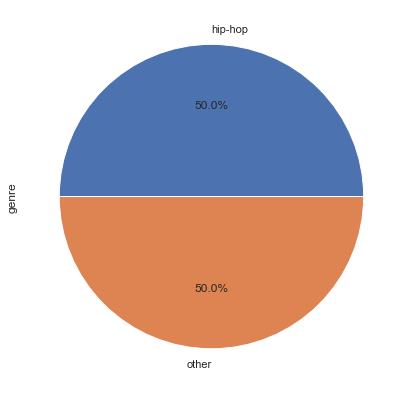

In [16]:
resampled_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

See summary statistics

In [17]:
resampled_tracks_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,0.647904,0.631320,0.487656,0.794501,0.584211,0.315272,0.222092,0.071469,0.182030,0.530264,0.431119,0.119298,0.738947
std,0.189891,0.214408,0.331625,0.109041,0.492987,0.298699,0.277654,0.220157,0.156365,0.244008,0.171237,0.071207,0.083587
min,0.007267,0.003605,0.000000,0.120350,0.000000,0.000000,0.000006,0.000000,0.012844,0.000000,0.043763,0.000000,0.000000
25%,0.533351,0.513597,0.181818,0.760257,0.000000,0.055283,0.024972,0.000000,0.082971,0.348799,0.301056,0.074936,0.750000
50%,0.672993,0.661523,0.545455,0.823091,1.000000,0.178496,0.098893,0.000003,0.116428,0.545407,0.389299,0.109382,0.750000
75%,0.792842,0.791398,0.818182,0.862098,1.000000,0.576271,0.297186,0.000912,0.242801,0.727452,0.525096,0.147697,0.750000
max,0.990239,0.997994,1.000000,1.000000,1.000000,1.000000,0.998996,0.997963,0.965817,1.000000,0.969165,0.936444,1.000000


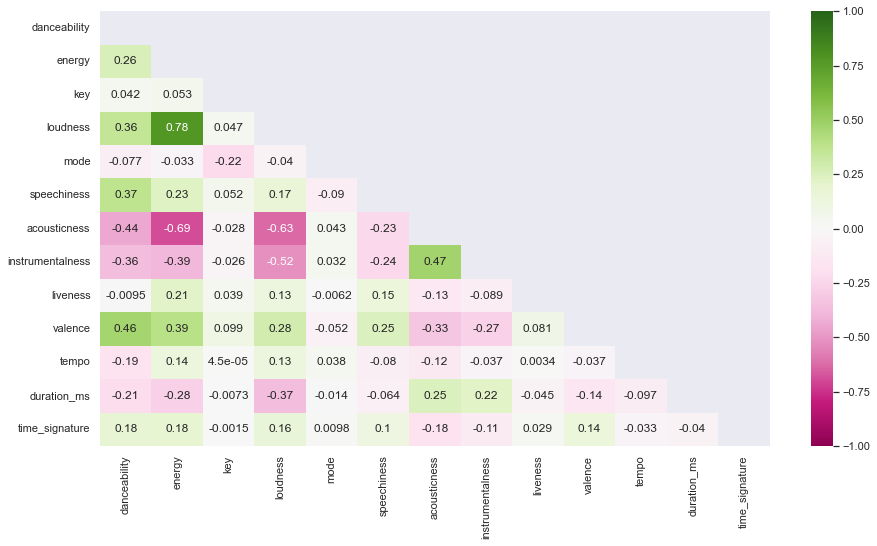

In [18]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(resampled_tracks_df.corr(), dtype=bool))
sns.heatmap(resampled_tracks_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="PiYG");

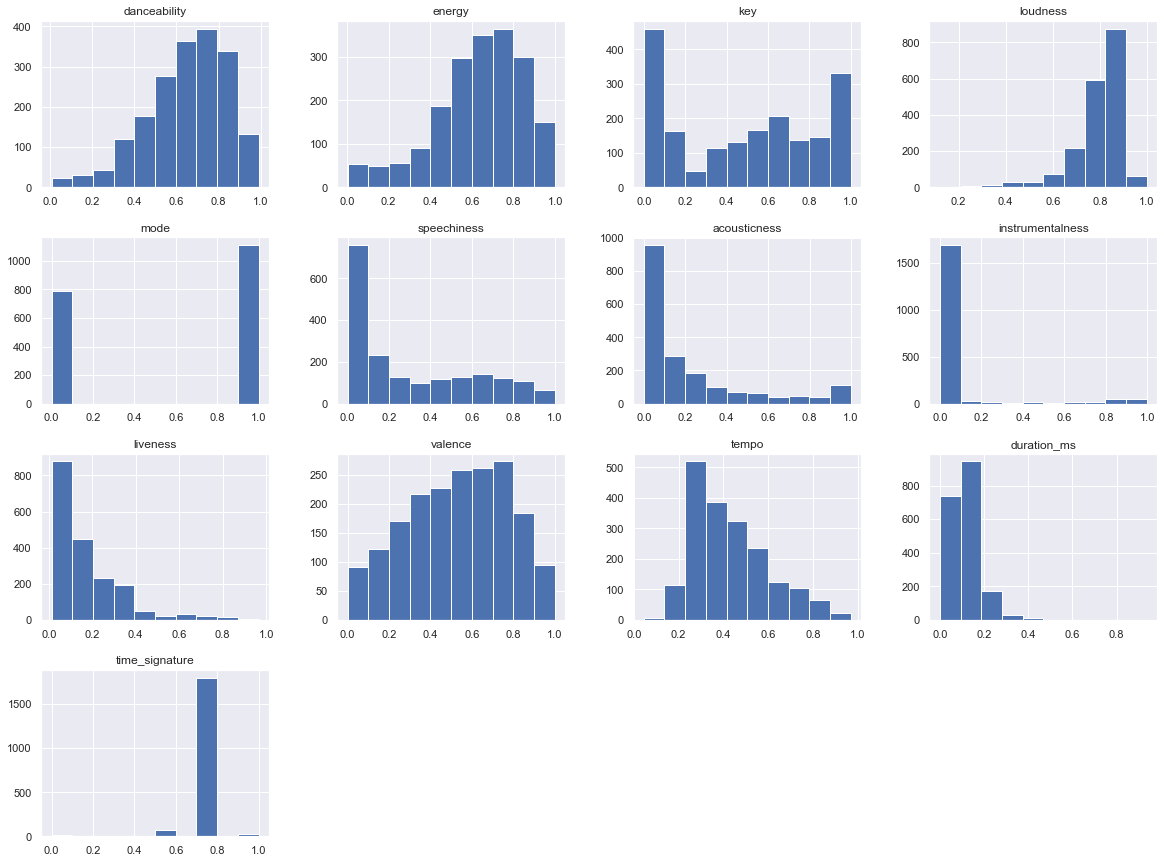

In [19]:
resampled_tracks_df.hist(figsize=(20,15));

Split data

In [20]:
# Feature variables
X = resampled_tracks_df.loc[:, resampled_tracks_df.columns != 'genre']
# Target variable
y = resampled_tracks_df['genre']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Decision Tree

In [22]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf = dt_clf.fit(X_train, y_train)

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


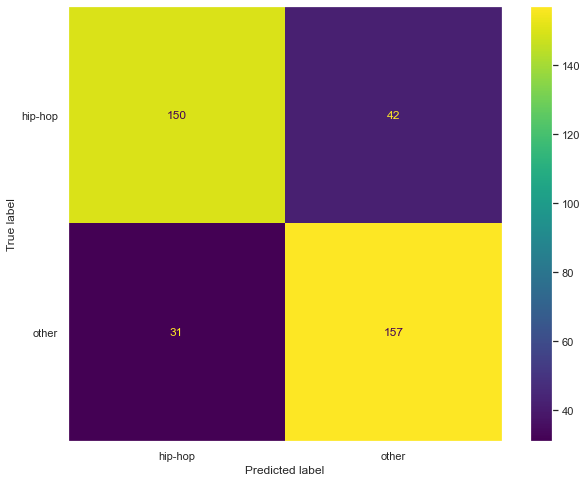

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=dt_clf.classes_, ax=ax);


Pruning decision tree

In [24]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]

dt_clfs = []

for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dt_clf.fit(X_train, y_train)
    dt_clfs.append(dt_clf)

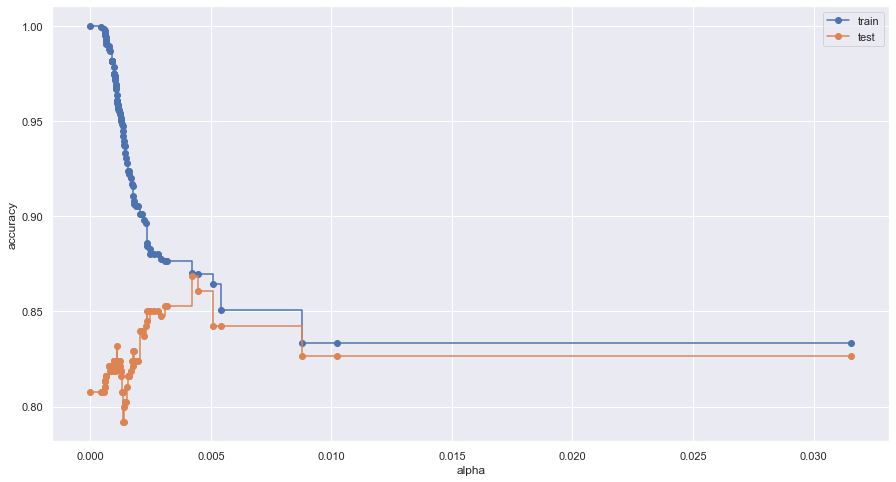

In [25]:
train_scores = [dt_clf.score(X_train, y_train) for dt_clf in dt_clfs]
test_scores = [dt_clf.score(X_test, y_test) for dt_clf in dt_clfs]

fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()

In [26]:
best_ccp = ccp_alphas[np.argmax(test_scores)]
best_ccp

0.004195379340191086

Cross Validation

<AxesSubplot:xlabel='tree'>

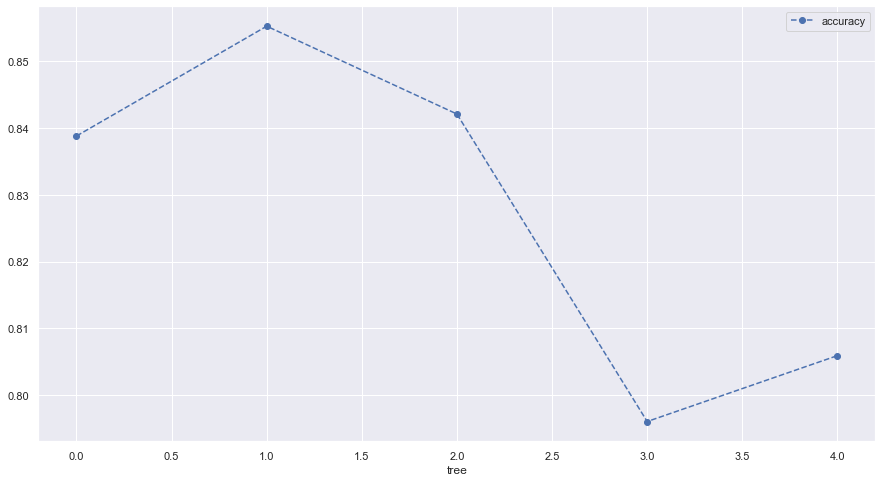

In [27]:
dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=best_ccp)
scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
fig, ax = plt.subplots(figsize=(15,8))
df.plot(x='tree', y='accuracy', marker='o', linestyle='--', ax=ax)

Above shows alpha is sensitive to different training/testing data.

<AxesSubplot:xlabel='alpha'>

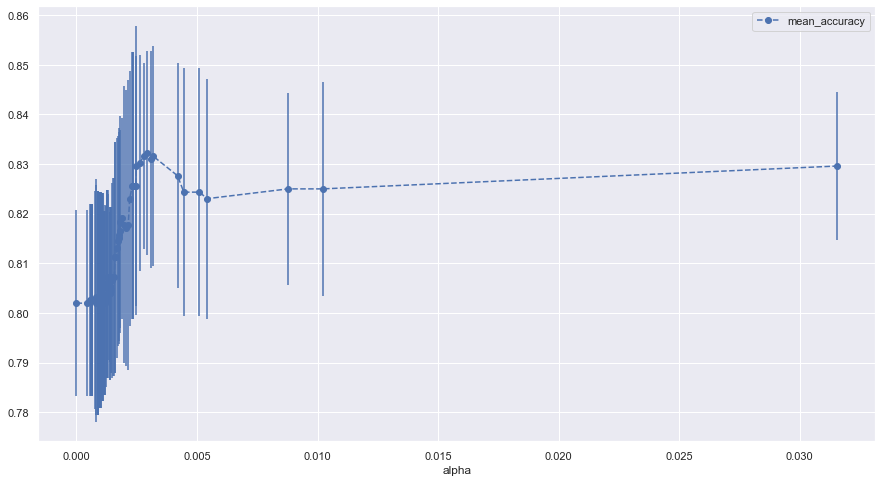

In [28]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
fig, ax = plt.subplots(figsize=(15,8))
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--', ax=ax)

In [29]:
ideal_ccp = alpha_results.iloc[alpha_results['mean_accuracy'].idxmax()]['alpha']
ideal_ccp

0.0029239766081871343

Building final tree

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


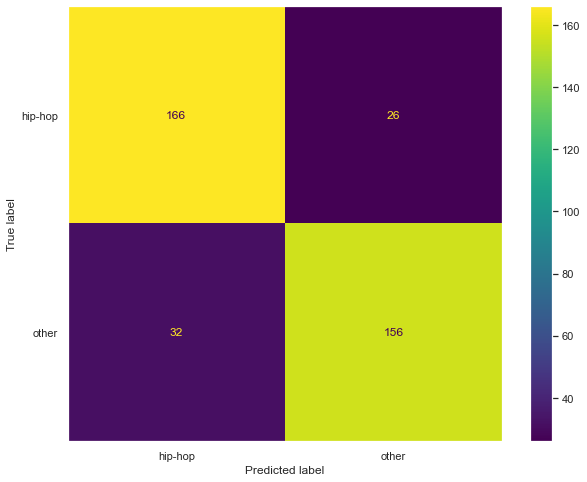

In [30]:
dt_clf_pruned = DecisionTreeClassifier(random_state=1, ccp_alpha=ideal_ccp)
dt_clf_pruned = dt_clf_pruned.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf_pruned, X_test, y_test, display_labels=dt_clf_pruned.classes_, ax=ax);

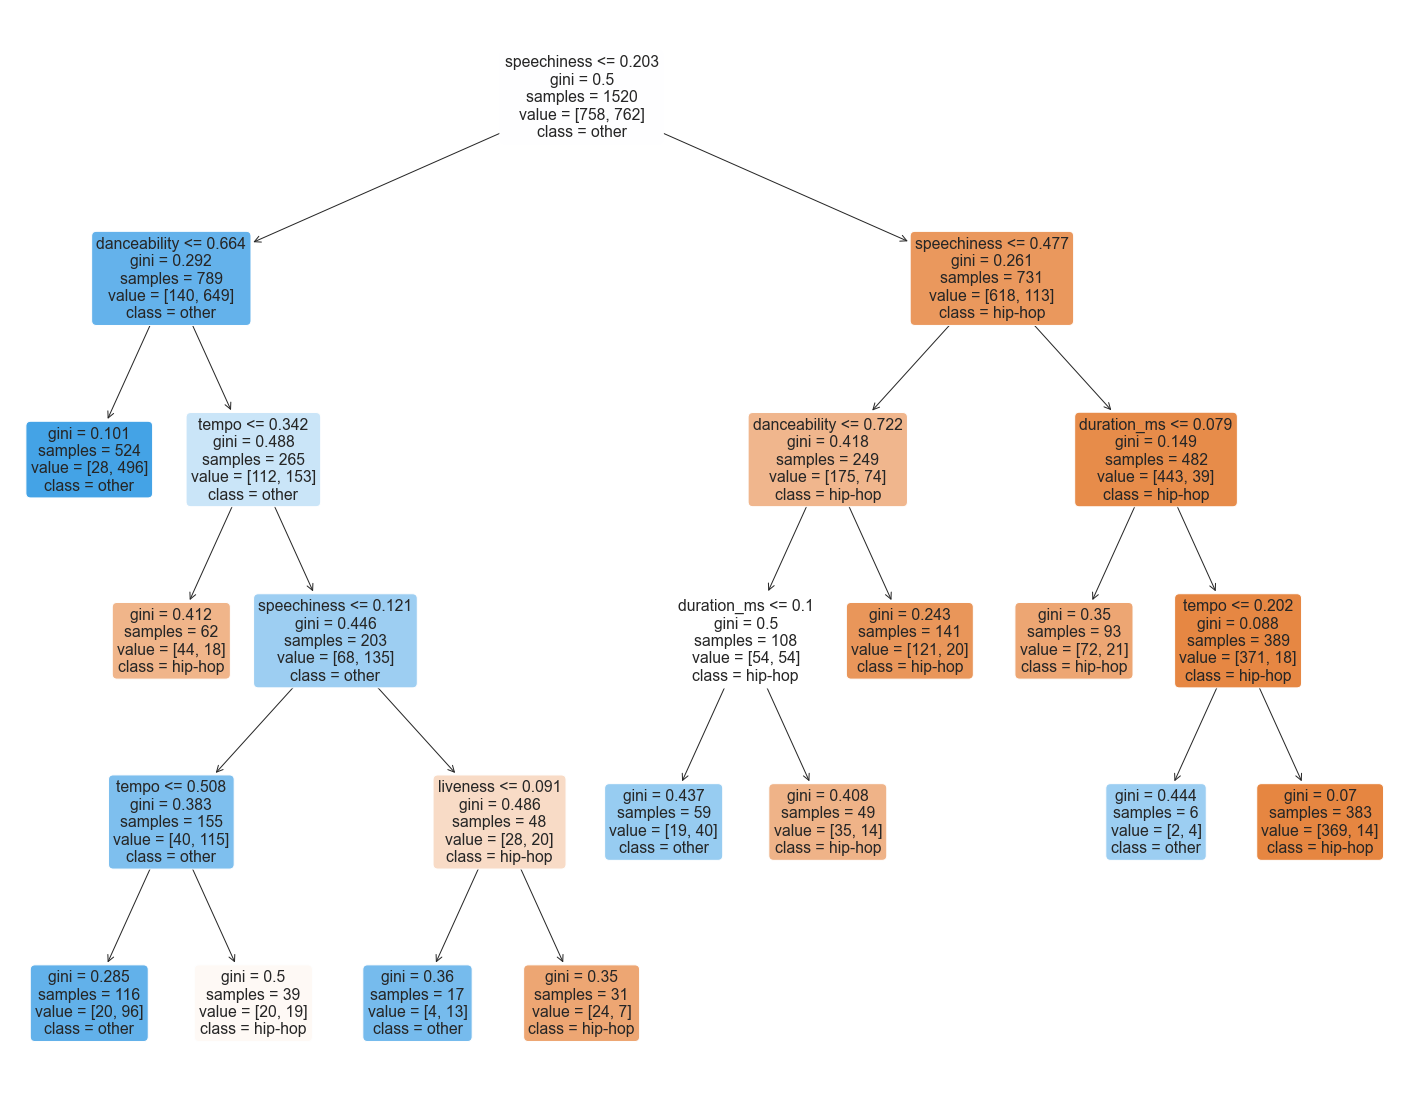

In [31]:
plt.figure(figsize=(25,20))
plot_tree(dt_clf_pruned, filled=True, rounded=True, class_names=dt_clf_pruned.classes_, feature_names=X.columns);

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [33]:
df = pd.read_pickle("../data/spotify_dataset_all.pkl")
df.loc[df['genre'] != 'hip-hop', 'genre'] = 0
df.loc[df['genre'] == 'hip-hop', 'genre'] = 1
df['genre'] = df['genre'].astype(int)
pdf = df.loc[df['genre'] == 1].sample(n=950, random_state=1)
odf = df.loc[df['genre'] == 0].sample(n=950, random_state=1)
df = pd.concat([pdf, odf])
df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
7EZPH9Px3gXlxD5KJDwtwc,1,0.871,0.743,2,-5.442,1,0.2770,0.00212,0.000,0.1410,0.5760,130.977,278827,4
6ZClQUx5QAuTuR2v2wx37F,1,0.747,0.894,1,-8.703,0,0.2930,0.15200,0.267,0.1070,0.8490,102.481,206520,4
0x1LCpY9Rgeq97VPajm81B,1,0.644,0.725,11,-4.618,1,0.0701,0.01120,0.000,0.1460,0.5840,77.977,222053,4
5mNV8Mz59bzyuQ53gTw0c0,1,0.596,0.661,5,-6.239,0,0.2260,0.31000,0.000,0.0847,0.8600,129.491,232573,5
1RZwfy4hD9ixk4XcIQpyW1,1,0.610,0.750,1,-5.811,1,0.1460,0.20100,0.000,0.9460,0.6270,95.048,226867,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4uJSCrI7r0usNJ3aaHAuC6,0,0.328,0.553,6,-6.252,1,0.0267,0.15600,0.412,0.0985,0.3220,159.959,464280,4
0jLVAklgGXRF7RxY1ogh6E,0,0.109,0.106,8,-21.555,1,0.0392,0.82000,0.816,0.1020,0.0334,88.285,594787,4
7jIAttgQTpLDoNtykIQXjH,0,0.726,0.537,0,-8.896,1,0.1140,0.31600,0.000,0.0707,0.8820,96.889,145707,4
6epvwUINain4iSHCTWA0sj,0,0.550,0.363,5,-7.326,1,0.0336,0.53400,0.000,0.1280,0.2860,121.940,230293,4


In [34]:
X = df.loc[:, df.columns != 'genre']
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
lr = sm.Logit(y_train, X_train).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.340799
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  genre   No. Observations:                 1520
Model:                          Logit   Df Residuals:                     1507
Method:                           MLE   Df Model:                           12
Date:                Thu, 02 Jun 2022   Pseudo R-squ.:                  0.5083
Time:                        15:28:43   Log-Likelihood:                -518.01
converged:                       True   LL-Null:                       -1053.6
Covariance Type:            nonrobust   LLR p-value:                9.477e-222
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability         6.0316      0.619      9.751      0.000       4.819       7.244
energy              -0.8305      0.657     -1.264      0.206      -2.118       0.457
key                 -0.0016      0.022     -0.072      0.942      -0.045       0.042
loudness            -0.0102      0.033     -0.314      0.753      -0.074       0.053
mode                -0.1555      0.162     -0.957      0.338      -0.474       0.163
speechiness         16.0441      0.950     16.890      0.000      14.182      17.906
acousticness        -2.3072      0.455     -5.076      0.000      -3.198      -1.416
instrumentalness    -1.0818      0.581     -1.861      0.063      -2.221       0.058
liveness             1.5772      0.564      2.799      0.005       0.473       2.682
valence              0.9288      0.400      2.320      0.020       0.144       1.713
tempo               -0.0113      0.003     -4.001      0.000      -0.017      -0.006
duration_ms       5.396e-06   1.32e-06      4.083      0.000    2.81e-06    7.99e-06
time_signature      -1.4741      0.199     -7.416      0.000      -1.864      -1.085
====================================================================================
"""